<a href="https://colab.research.google.com/github/noorelhaj98-ship-it/traffffic/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
!unzip "dog and cat.v1i.yolov8.zip" -d dog_cat


In [ ]:
!ls dog_cat


In [ ]:
!sed -i 's|../train/images|train/images|' dog_cat/data.yaml
!sed -i 's|../valid/images|valid/images|' dog_cat/data.yaml
!sed -i 's|../test/images|test/images|' dog_cat/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="dog_cat/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dog_cat/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788ecac8ad20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

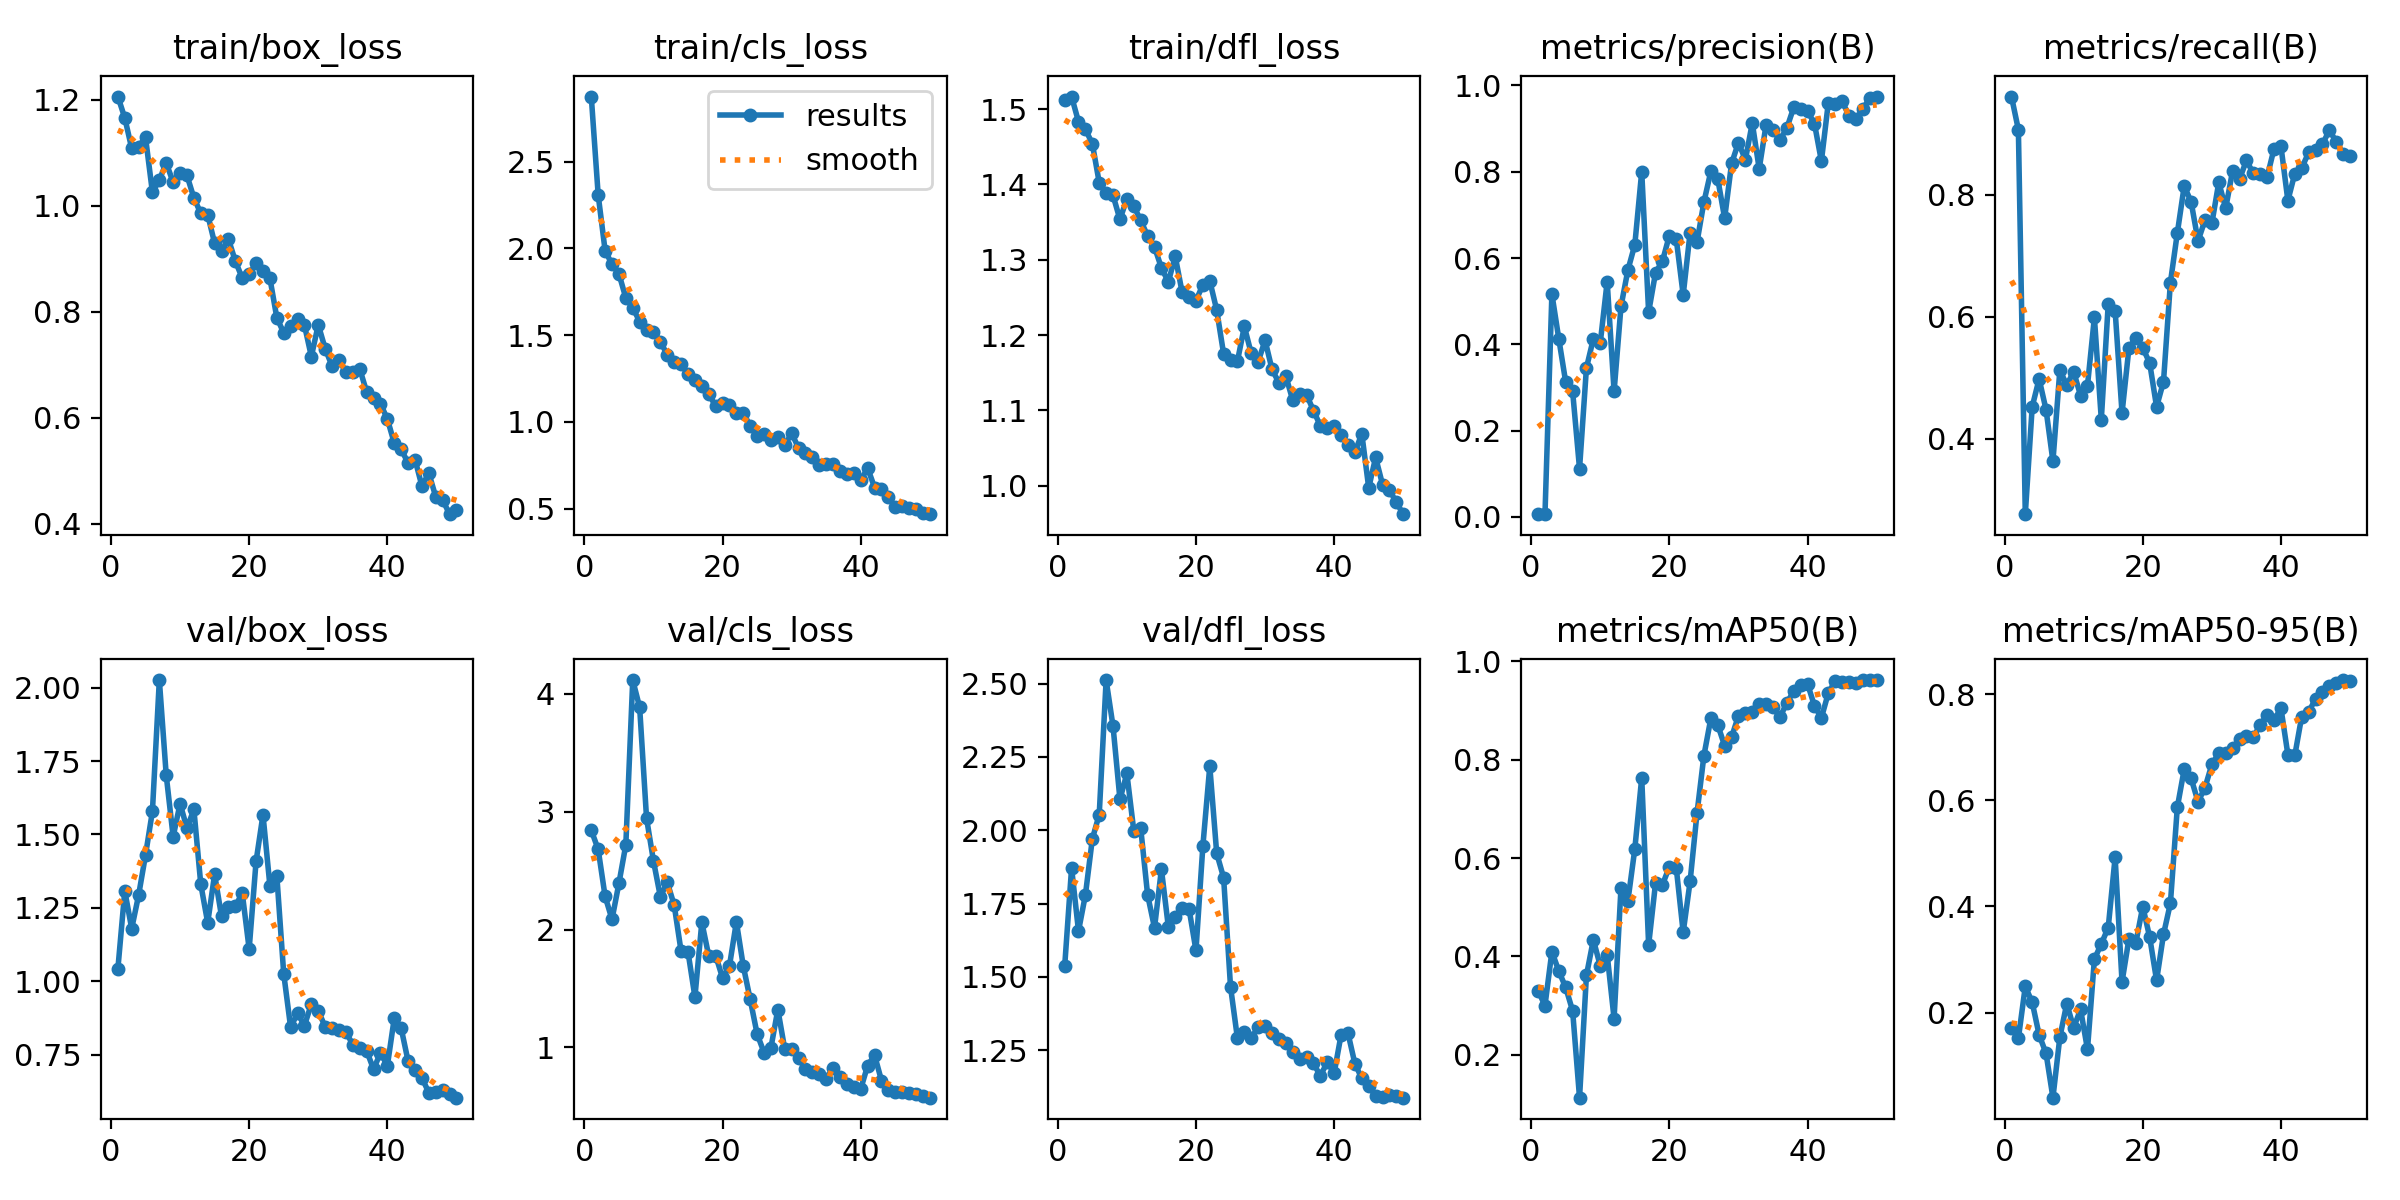

In [ ]:
from IPython.display import Image, display

display(Image("runs/detect/train/results.png", width=900))


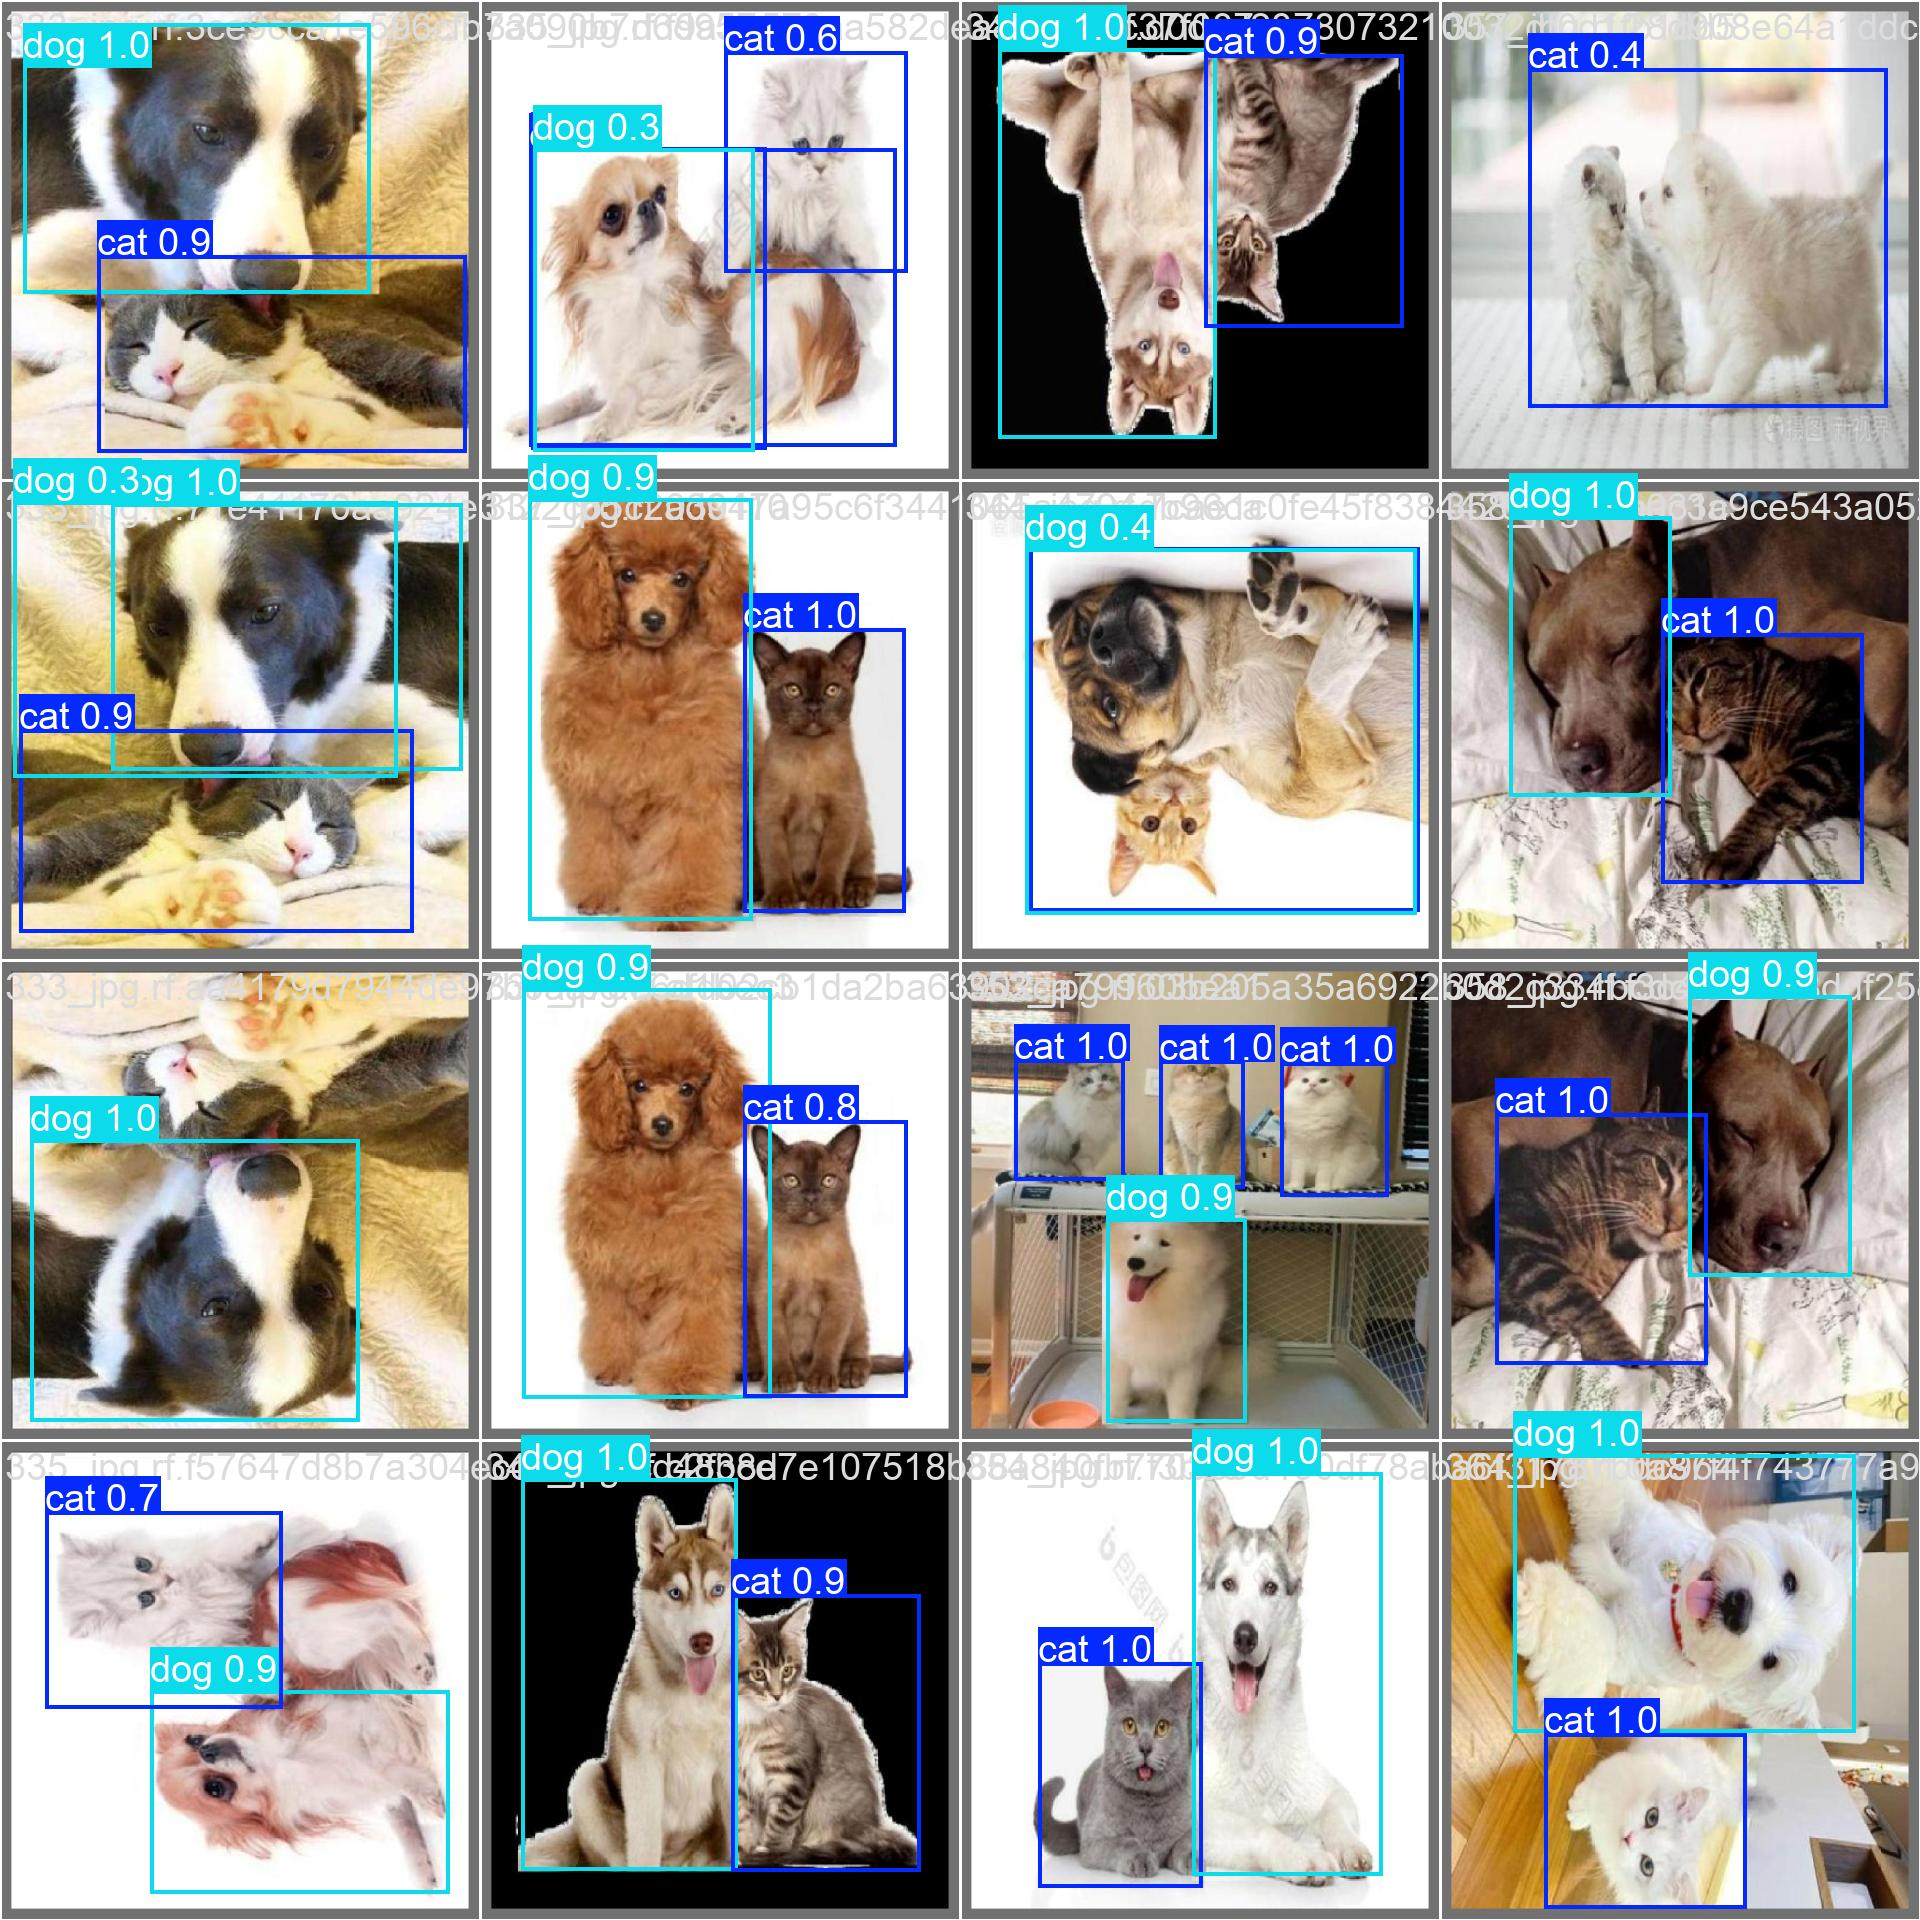

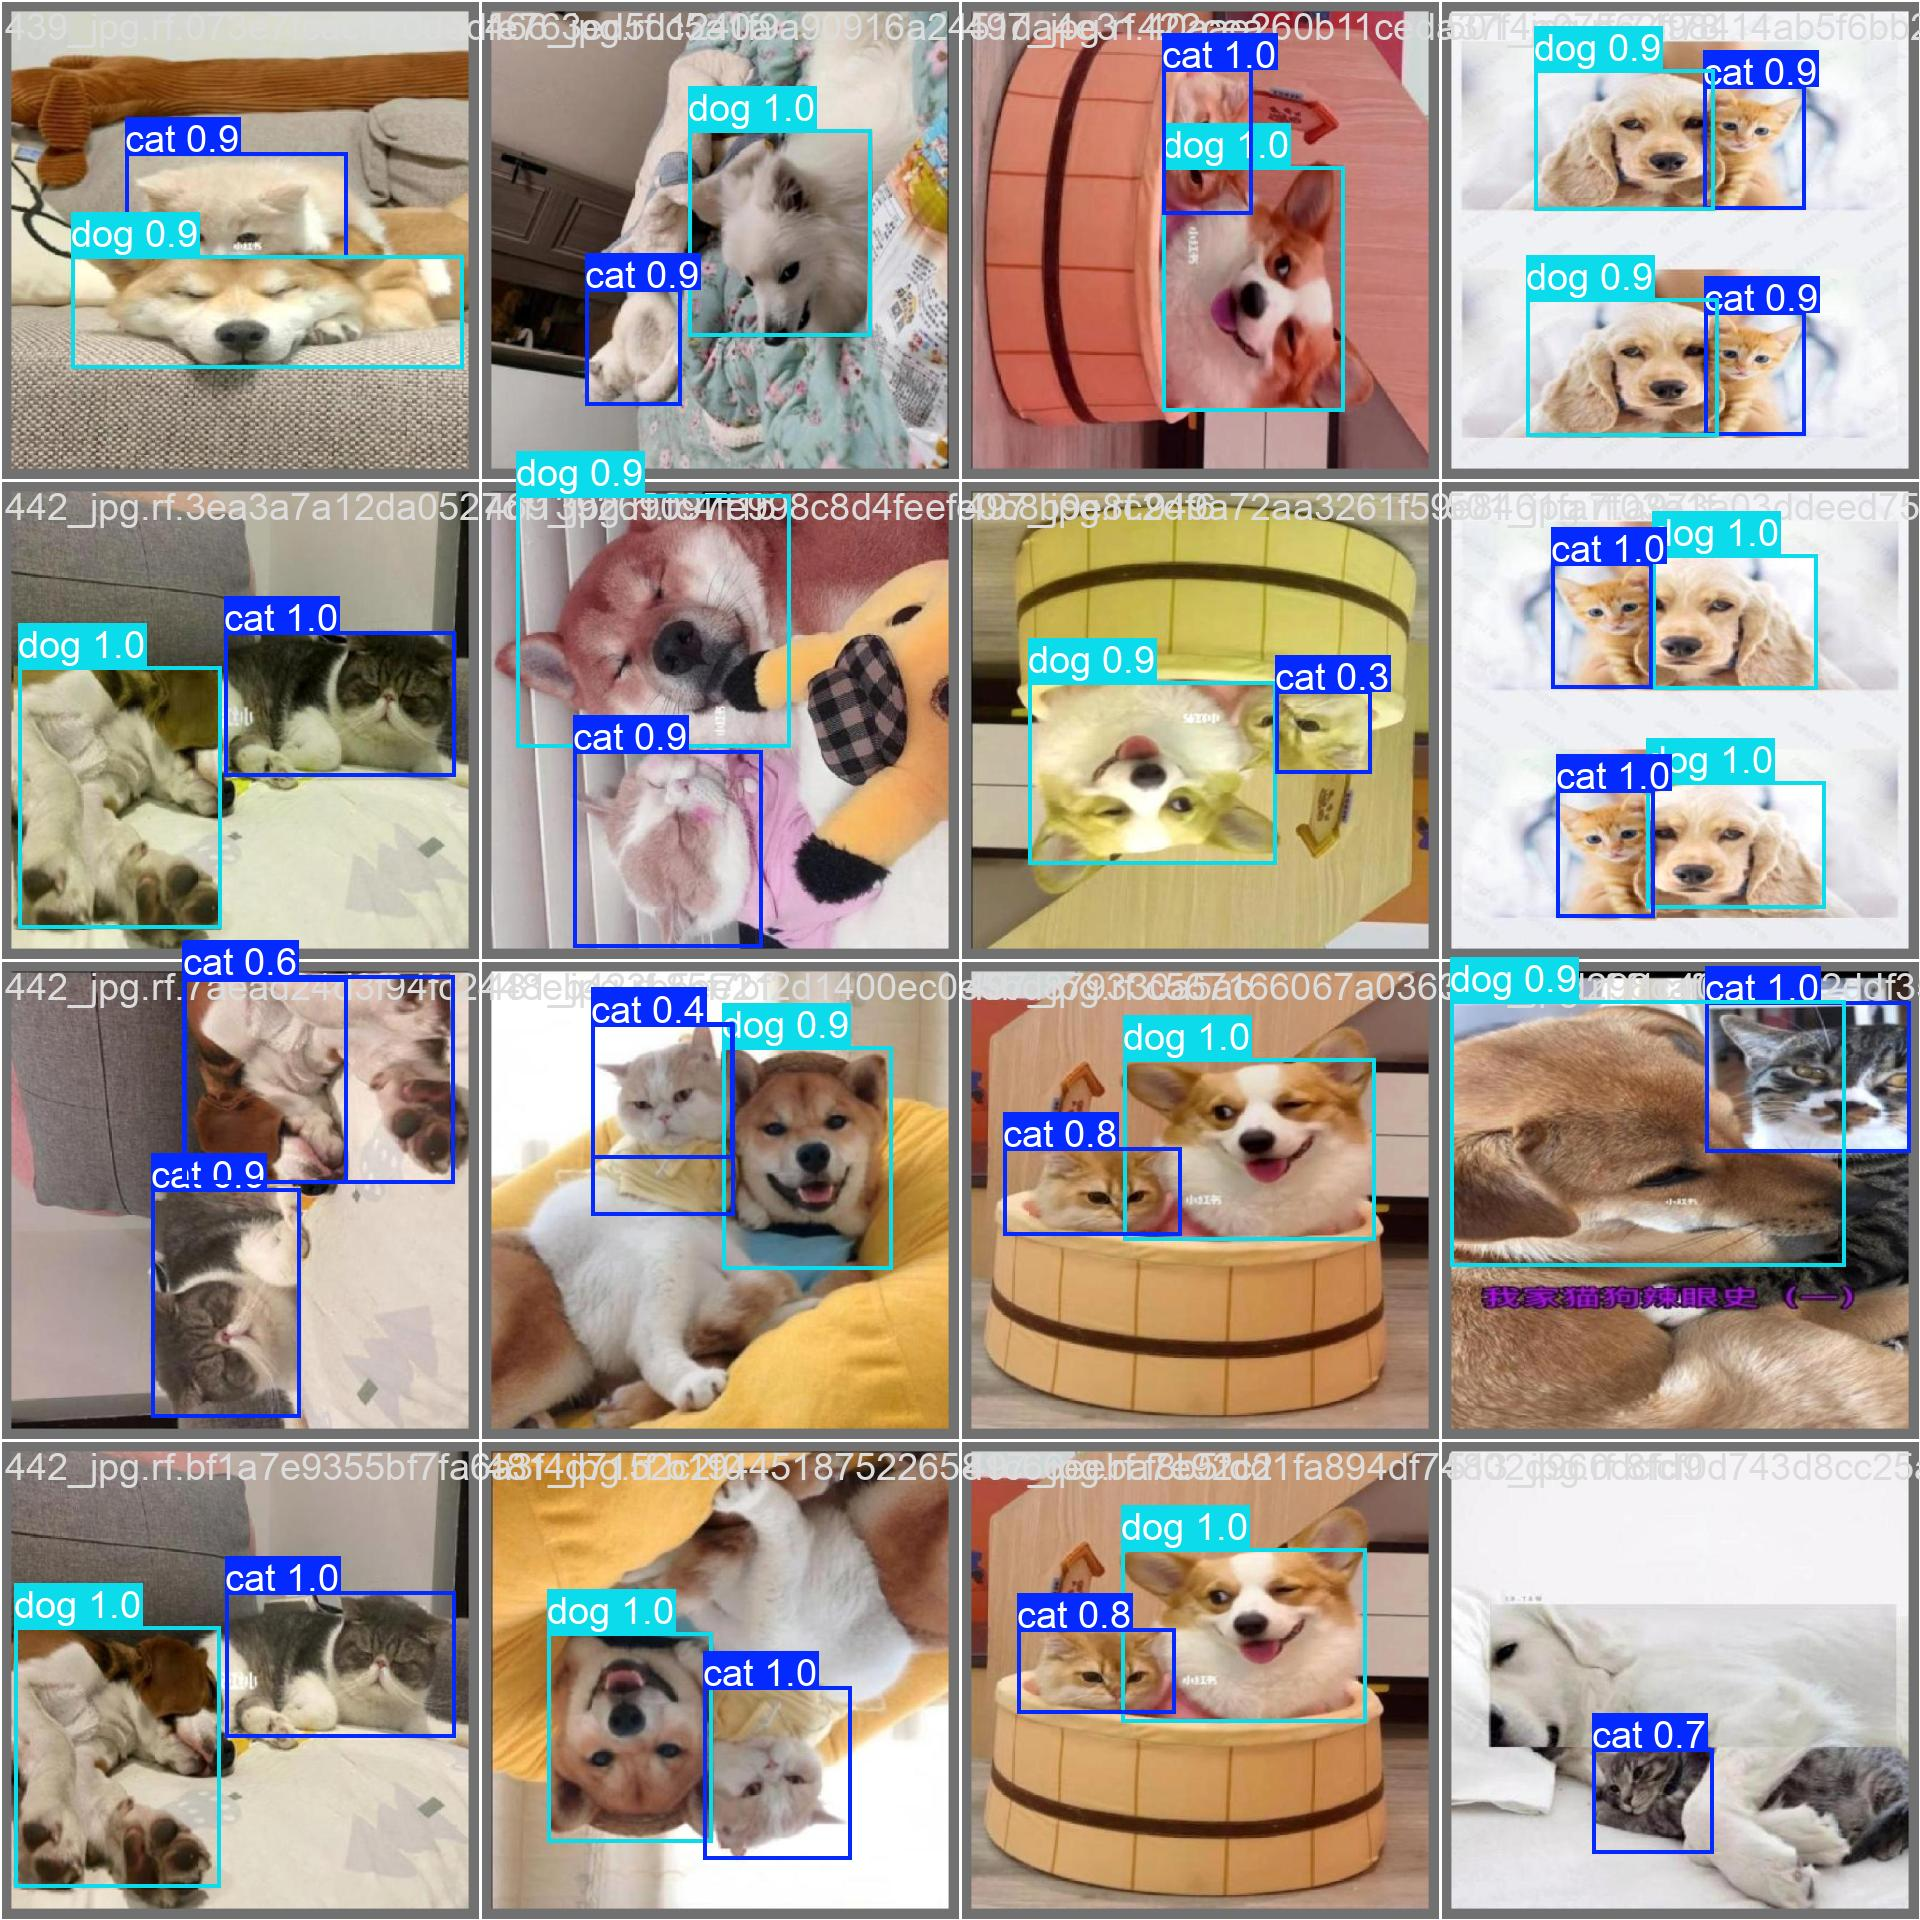

In [ ]:
import glob
from IPython.display import Image, display

preds = sorted(glob.glob("runs/detect/train/val_batch*_pred.jpg"))
for p in preds[:3]:   # show first 3
    display(Image(p, width=900))



In [ ]:
import pandas as pd

df = pd.read_csv("runs/detect/train/results.csv")
df.tail(5)



,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,170.460,0.49564,0.51593,1.03743,0.92991,0.88266,0.95848,0.80301,0.62059,0.62420,1.09334,0.000182,0.000182,0.000182
46,47,173.655,0.45096,0.50367,1.00135,0.92141,0.90602,0.95676,0.81577,0.62258,0.61398,1.09073,0.000149,0.000149,0.000149
47,48,177.970,0.44516,0.49576,0.99419,0.94529,0.88699,0.96158,0.82129,0.62877,0.60164,1.09903,0.000116,0.000116,0.000116
48,49,181.051,0.41813,0.47673,0.97770,0.97117,0.86728,0.96192,0.82639,0.61564,0.58759,1.09530,0.000083,0.000083,0.000083
49,50,184.168,0.42603,0.46824,0.96204,0.97438,0.86330,0.96145,0.82553,0.60374,0.57376,1.08845,0.000050,0.000050,0.000050


In [ ]:
best = df.iloc[df["metrics/mAP50-95(B)"].idxmax()]
best


,48
epoch,49.000000
time,181.051000
train/box_loss,0.418130
train/cls_loss,0.476730
train/dfl_loss,0.977700
metrics/precision(B),0.971170
metrics/recall(B),0.867280
metrics/mAP50(B),0.961920
metrics/mAP50-95(B),0.826390
val/box_loss,0.615640


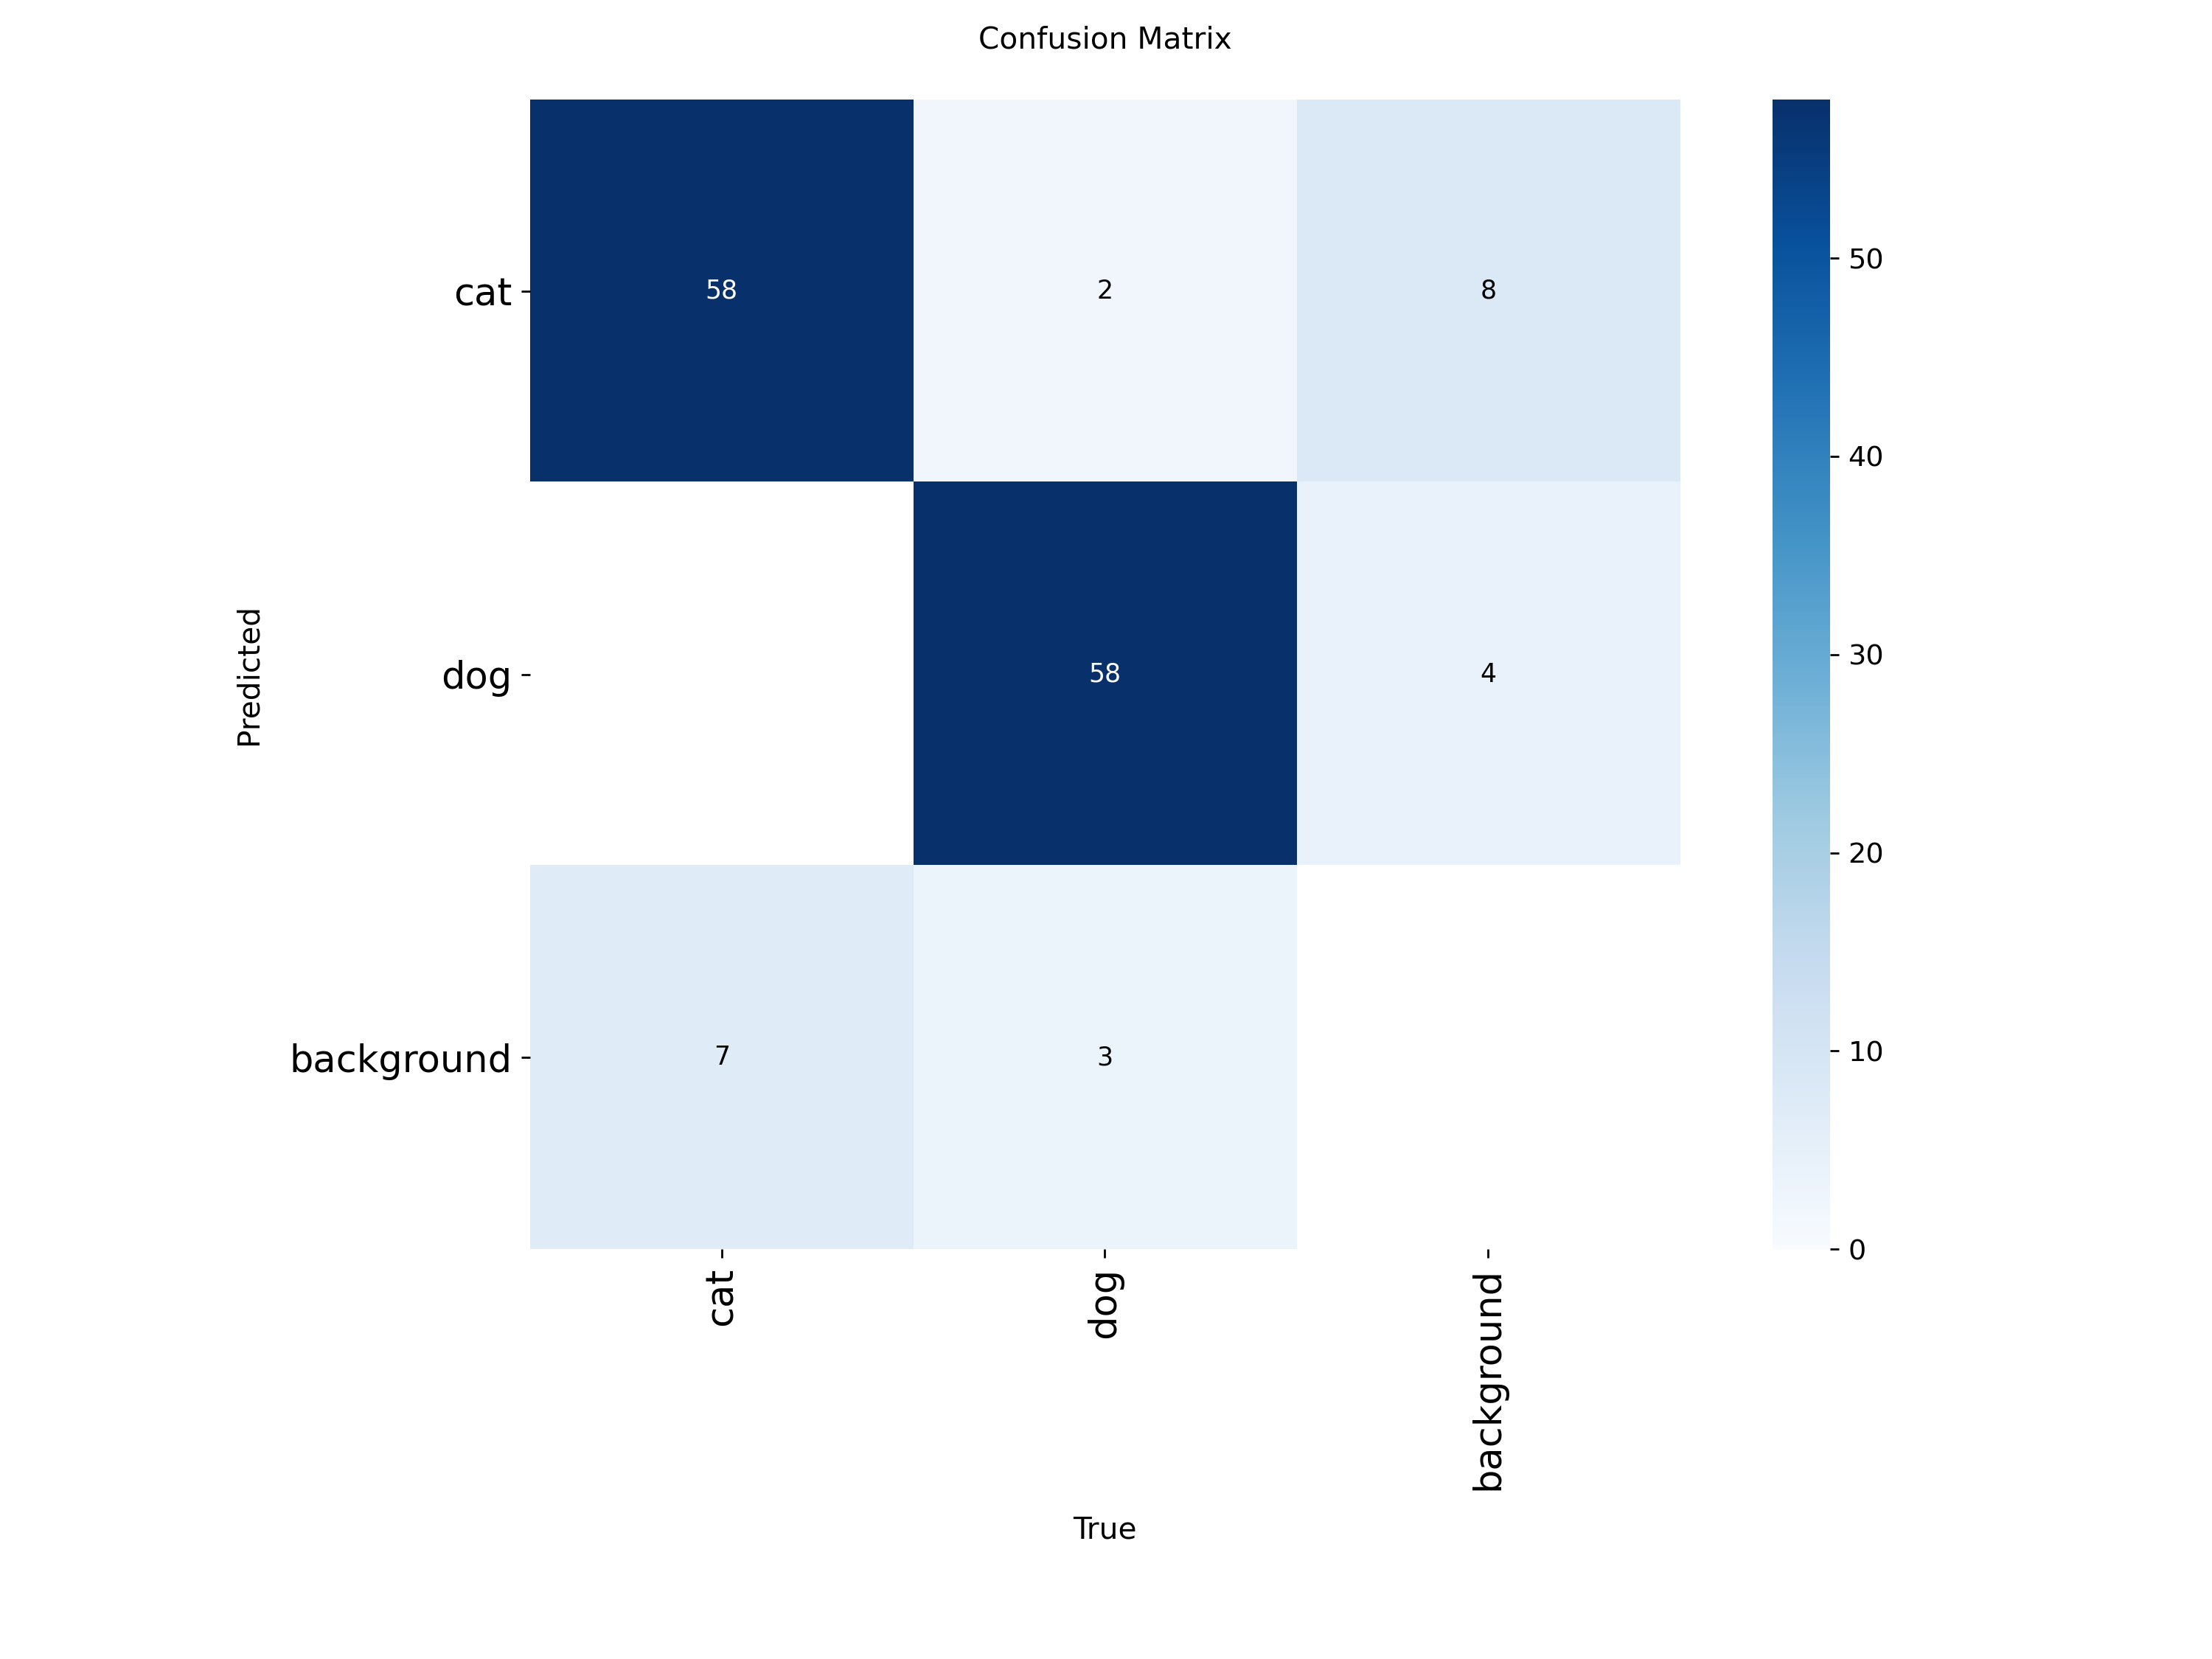

In [ ]:
display(Image("runs/detect/train/confusion_matrix.png", width=700))


In [ ]:
!find . -name "data.yaml"


./dog_cat/data.yaml


In [ ]:
from IPython.display import Image, display
import glob
import os


In [ ]:
runs = sorted(glob.glob("runs/detect/train*"), key=os.path.getmtime)
print(runs)


['runs/detect/train', 'runs/detect/train2']


In [ ]:
latest_run = runs[-1]
print("Latest run:", latest_run)


Latest run: runs/detect/train2


In [ ]:
from IPython.display import Image, display
import os

latest_run = "runs/detect/train2"

plots = [
    "PR_curve.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
]

for p in plots:
    path = f"{latest_run}/{p}"
    if os.path.exists(path):
        display(Image(path, width=750))
    else:
        print(f"{p} not found")


PR_curve.png not found
F1_curve.png not found
P_curve.png not found
R_curve.png not found


In [ ]:
import os

os.listdir("runs/detect/train2")


['val_batch1_labels.jpg',
 'labels.jpg',
 'val_batch1_pred.jpg',
 'train_batch482.jpg',
 'BoxR_curve.png',
 'BoxP_curve.png',
 'val_batch0_pred.jpg',
 'weights',
 'val_batch0_labels.jpg',
 'confusion_matrix_normalized.png',
 'BoxF1_curve.png',
 'args.yaml',
 'train_batch2.jpg',
 'confusion_matrix.png',
 'train_batch481.jpg',
 'train_batch480.jpg',
 'results.png',
 'results.csv',
 'train_batch0.jpg',
 'BoxPR_curve.png',
 'train_batch1.jpg']

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

metrics = model.val(data="dog_cat/data.yaml")


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1142.1±155.0 MB/s, size: 53.0 KB)
val: Scanning /content/dog_cat/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 18.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.0it/s 2.0s
                   all         60        128      0.971      0.867      0.962      0.823
                   cat         60         65      0.946      0.862      0.949        0.8
                   dog         59         63      0.996      0.873      0.974      0.847
Speed: 8.8ms preprocess, 6.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/detect/val


In [ ]:
os.listdir("runs/detect/train2")


['val_batch1_labels.jpg',
 'labels.jpg',
 'val_batch1_pred.jpg',
 'train_batch482.jpg',
 'BoxR_curve.png',
 'BoxP_curve.png',
 'val_batch0_pred.jpg',
 'weights',
 'val_batch0_labels.jpg',
 'confusion_matrix_normalized.png',
 'BoxF1_curve.png',
 'args.yaml',
 'train_batch2.jpg',
 'confusion_matrix.png',
 'train_batch481.jpg',
 'train_batch480.jpg',
 'results.png',
 'results.csv',
 'train_batch0.jpg',
 'BoxPR_curve.png',
 'train_batch1.jpg']

In [ ]:
print(metrics.box.f1)


[    0.90184     0.93038]
